In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sys
sys.path.append("C:/Users10710/OneDrive/桌面/HW8/")
from kmeans import k_means, Cal_Distance, Cal_Accuracy
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
import pandas as pd
from pandas import Series,DataFrame


def Cal_Accuracy_testdata(result,testcount):
    #For iris dataset
    classify_data = [[] for i in range(3)]

    classify_data[0] = result[0:test_count[0]]
    classify_data[1] = result[test_count[0]:test_count[0]+test_count[1]]
    classify_data[2] = result[test_count[0]+test_count[1]:test_count[0]+test_count[1]+test_count[2]]
    numberlabel = [[],[],[]]
    count = [[],[],[]]
    acc = [[],[],[]]
    for i in range(0,3):
        numberlabel[i] = max(classify_data[i],key=classify_data[i].count)
        count[i] = classify_data[i].count(numberlabel[i])
    for i in range(0,3):
        acc[i] = count[i]/len(classify_data[i])

    acc = np.mean(acc)

    return acc

def Cal_Distance_digitnumber(feature, center):
    dimension = len(feature)
    dist = 0.0
    for i in range(dimension):
        dist += (feature[i] - center[i]) ** 2
    return math.sqrt(dist)

def testdata_classify(testdata,center):
    data = testdata[:,1:]
    labels = [-1 for i in range(len(data))]

    for labelIndex, item in enumerate(data):
        classIndex = -1
        minDist = math.inf            
        for i, point in enumerate(center):
            dist = Cal_Distance_digitnumber(item, point)
            #Minimize the distance ,select the cluster
            if(dist < minDist):
                classIndex = i
                minDist = dist
        labels[labelIndex] = classIndex
    return labels

In [51]:
train_dataset =  pd.read_csv('C:/Users/10710/OneDrive/桌面/HW8/ziptrain.csv', header=None)
train_dataset = train_dataset.drop([0],axis =0)
train_dataset = train_dataset.drop([0],axis =1)
train_dataset = train_dataset[train_dataset[1].isin([1,4,8,'1','4','8'])]

test_dataset = pd.read_csv('C:/Users/10710/OneDrive/桌面/HW8/ziptest.csv', header=None)
test_dataset = test_dataset.drop([0],axis = 0)
test_dataset = test_dataset.drop([0],axis = 1)
test_dataset = test_dataset[test_dataset[1].isin([1,4,8,'1','4','8'])]


train_dataset_np = train_dataset.values
test_dataset_np = test_dataset.values

for i in range(0,len(train_dataset_np)):
    for j in range(0,len(train_dataset_np[0])):
        train_dataset_np[i][j] =float(train_dataset_np[i][j])

for i in range(0,len(test_dataset_np)):
    for j in range(0,len(test_dataset_np[0])):
        test_dataset_np[i][j] =float(test_dataset_np[i][j])

#The first number is class [1,4,8]
#print(train_dataset_np)
#print(test_dataset_np)

#Count 1,4,8:
train_count = [0,0,0]

for i in range(0,len(train_dataset_np)):
    if train_dataset_np[i][0] == 1:
        train_count[0] += 1
    if train_dataset_np[i][0] == 4:
        train_count[1] += 1
    if train_dataset_np[i][0] == 8:
        train_count[2] += 1
#print(train_count)

test_count = [0,0,0]

for i in range(0,len(test_dataset_np)):
    if test_dataset_np[i][0] == 1:
        test_count[0] += 1
    if test_dataset_np[i][0] == 4:
        test_count[1] += 1
    if test_dataset_np[i][0] == 8:
        test_count[2] += 1

print(train_count)
train_dataset_np_order = train_dataset_np[train_dataset_np[:,0].argsort()]#The number:1:1005, 4:652, 8:542
test_dataset_np_order = test_dataset_np[test_dataset_np[:,0].argsort()]

#print(train_dataset_np_order)

C:\Users\10710\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [52]:
#Kmeans output predicted labels
result = k_means(train_dataset_np_order, 3, 1000)
print(result[1])

The k-means converge at loop  7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [53]:
#A method to assign class labels to each of your clusters：
acc = Cal_Accuracy_testdata(result[1], train_count)
print("The acc of training is :",acc)

The acc of training is : 0.9983333333333334


In [54]:
#Predict labels on the zip.test data:
labels = testdata_classify(test_dataset_np_order, result[2])
print("Print labels", labels)

Print labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,

In [55]:
#Acc:
acc_test = Cal_Accuracy_testdata(labels, test_count)
print("The acc of test is :",acc_test)

The acc of test is : 0.9370755750273823


Output after PCA data: [[-4.50915592  1.02241001]
 [-4.62204803 -2.7048762 ]
 [-4.8764324  -2.70574602]
 ...
 [ 1.54002036  3.08399921]
 [ 2.90681349  3.08255192]
 [ 3.0860975  -1.20532061]]


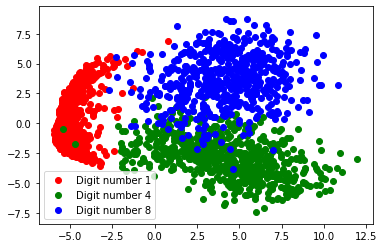

In [56]:
#PCA:
train_data_pca = train_dataset_np_order[:,1:]
train_pca = PCA(n_components= 2)
pca_data = train_pca.fit_transform(train_data_pca)
print("Output after PCA data:" , pca_data)

pca_data_label = train_dataset_np_order[:,0:1]
pca_train_data = np.hstack((pca_data_label, pca_data))
#print(pca_train_data)

class_1 = []
class_2 = []
class_3 = []
for i in range(0, len(pca_train_data)):
    if pca_train_data[i][0] ==1.0:
        class_1.append(pca_train_data[i])
    if pca_train_data[i][0] ==4.0:
        class_2.append(pca_train_data[i])
    if pca_train_data[i][0] ==8.0:
        class_3.append(pca_train_data[i])

#Plot:
import numpy as np  
import matplotlib.pyplot as plt
x1 = np.array(class_1)[:,1]
y1 = np.array(class_1)[:,2]
x4 = np.array(class_2)[:,1]
y4 = np.array(class_2)[:,2]
x8 = np.array(class_3)[:,1]
y8 = np.array(class_3)[:,2]

fig = plt.figure()
ax = plt.subplot()
ax.scatter(x1, y1, c='red',label= 'Digit number 1')
ax.scatter(x4, y4, c='green',label= 'Digit number 4')  
ax.scatter(x8, y8, c='blue',label= 'Digit number 8')  
plt.legend()
plt.show()


In [57]:
#pca kmeans:
result_pca = k_means(pca_train_data, 3, 1000)
acc_pca = Cal_Accuracy_testdata(result_pca[1], train_count)
print("The acc of training is :",acc_pca)

The k-means converge at loop  8
The acc of training is : 0.9963253012048193


In [58]:
#acc_loss:
print("The acc loss is :", acc-acc_pca)

The acc loss is : 0.002008032128514081
